In [89]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [90]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [91]:
# Define parameters
N=10
lmd = 0.02272
J = 2

state_dictionary = {"1":1}
state_dictionary = {"10":1, "01":1}
state_dictionary = {"001":1}

ti = 0
tf = 150
Nsteps = 500

In [92]:
initial_state = md.create_domain_wall_state(state_dictionary, register= "Alice", one_step=True)
final_state   = md.create_domain_wall_state(state_dictionary, register= "Bob",   one_step=True)

register_size = len(initial_state.dims[0])

initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
final_chain =   md.initialize_general_system(N, final_state,   register='Bob'  )




In [93]:
H_t = Ham.Hamiltonian(system_size = N,
                    mode = "transport",
                    lambda_factor = lmd,
                    global_J = J
                    )

H_r = Ham.Hamiltonian(system_size = N,
                    mode = "reset",
                    lambda_factor = lmd,
                    register_size = register_size,
                    global_J = J
                    )

In [94]:
#transport_steps, transport_time = dyn.chain_calibration(initial_chain, H_t, ti, tf, Nsteps)

In [95]:
# test that algorithm works well without errors
fidelity, magnetizations = dyn.OneStepAlgorithm(initial_chain, final_chain, H_t, ti, tf, Nsteps, factor = 1.12)

print(max(fidelity))

0.9990009112113887


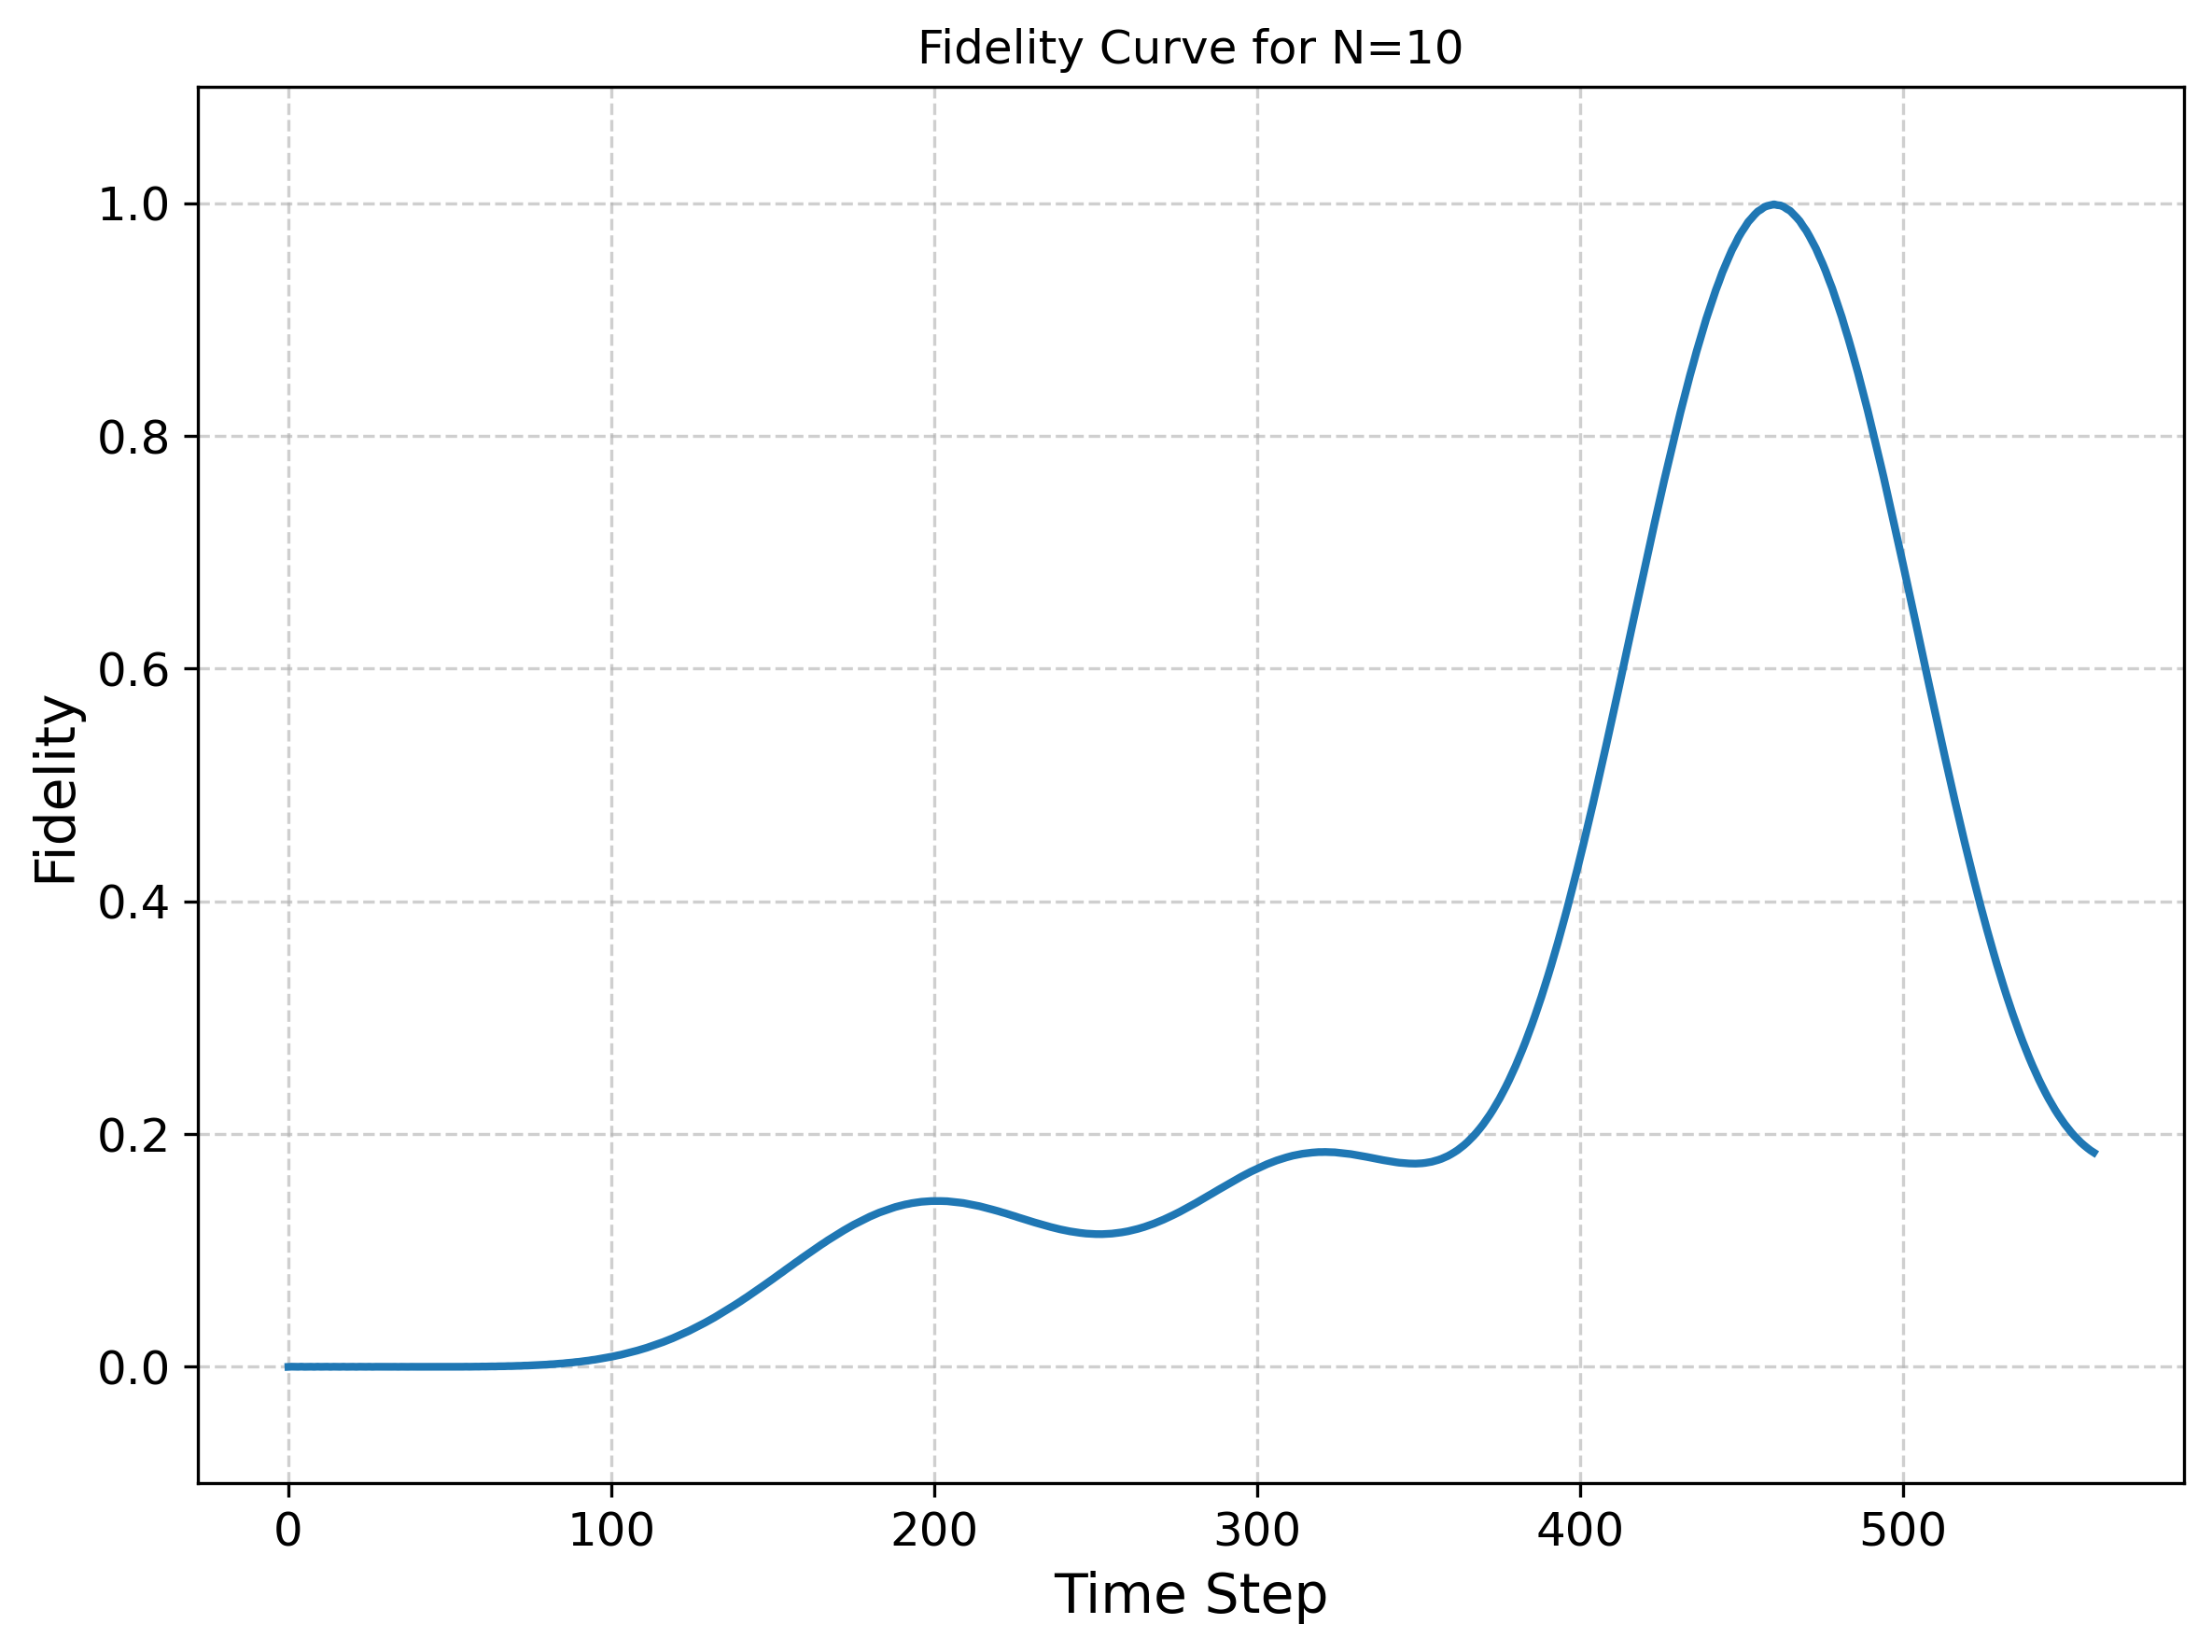

In [96]:
plots.plot_fidelity(fidelity, N)

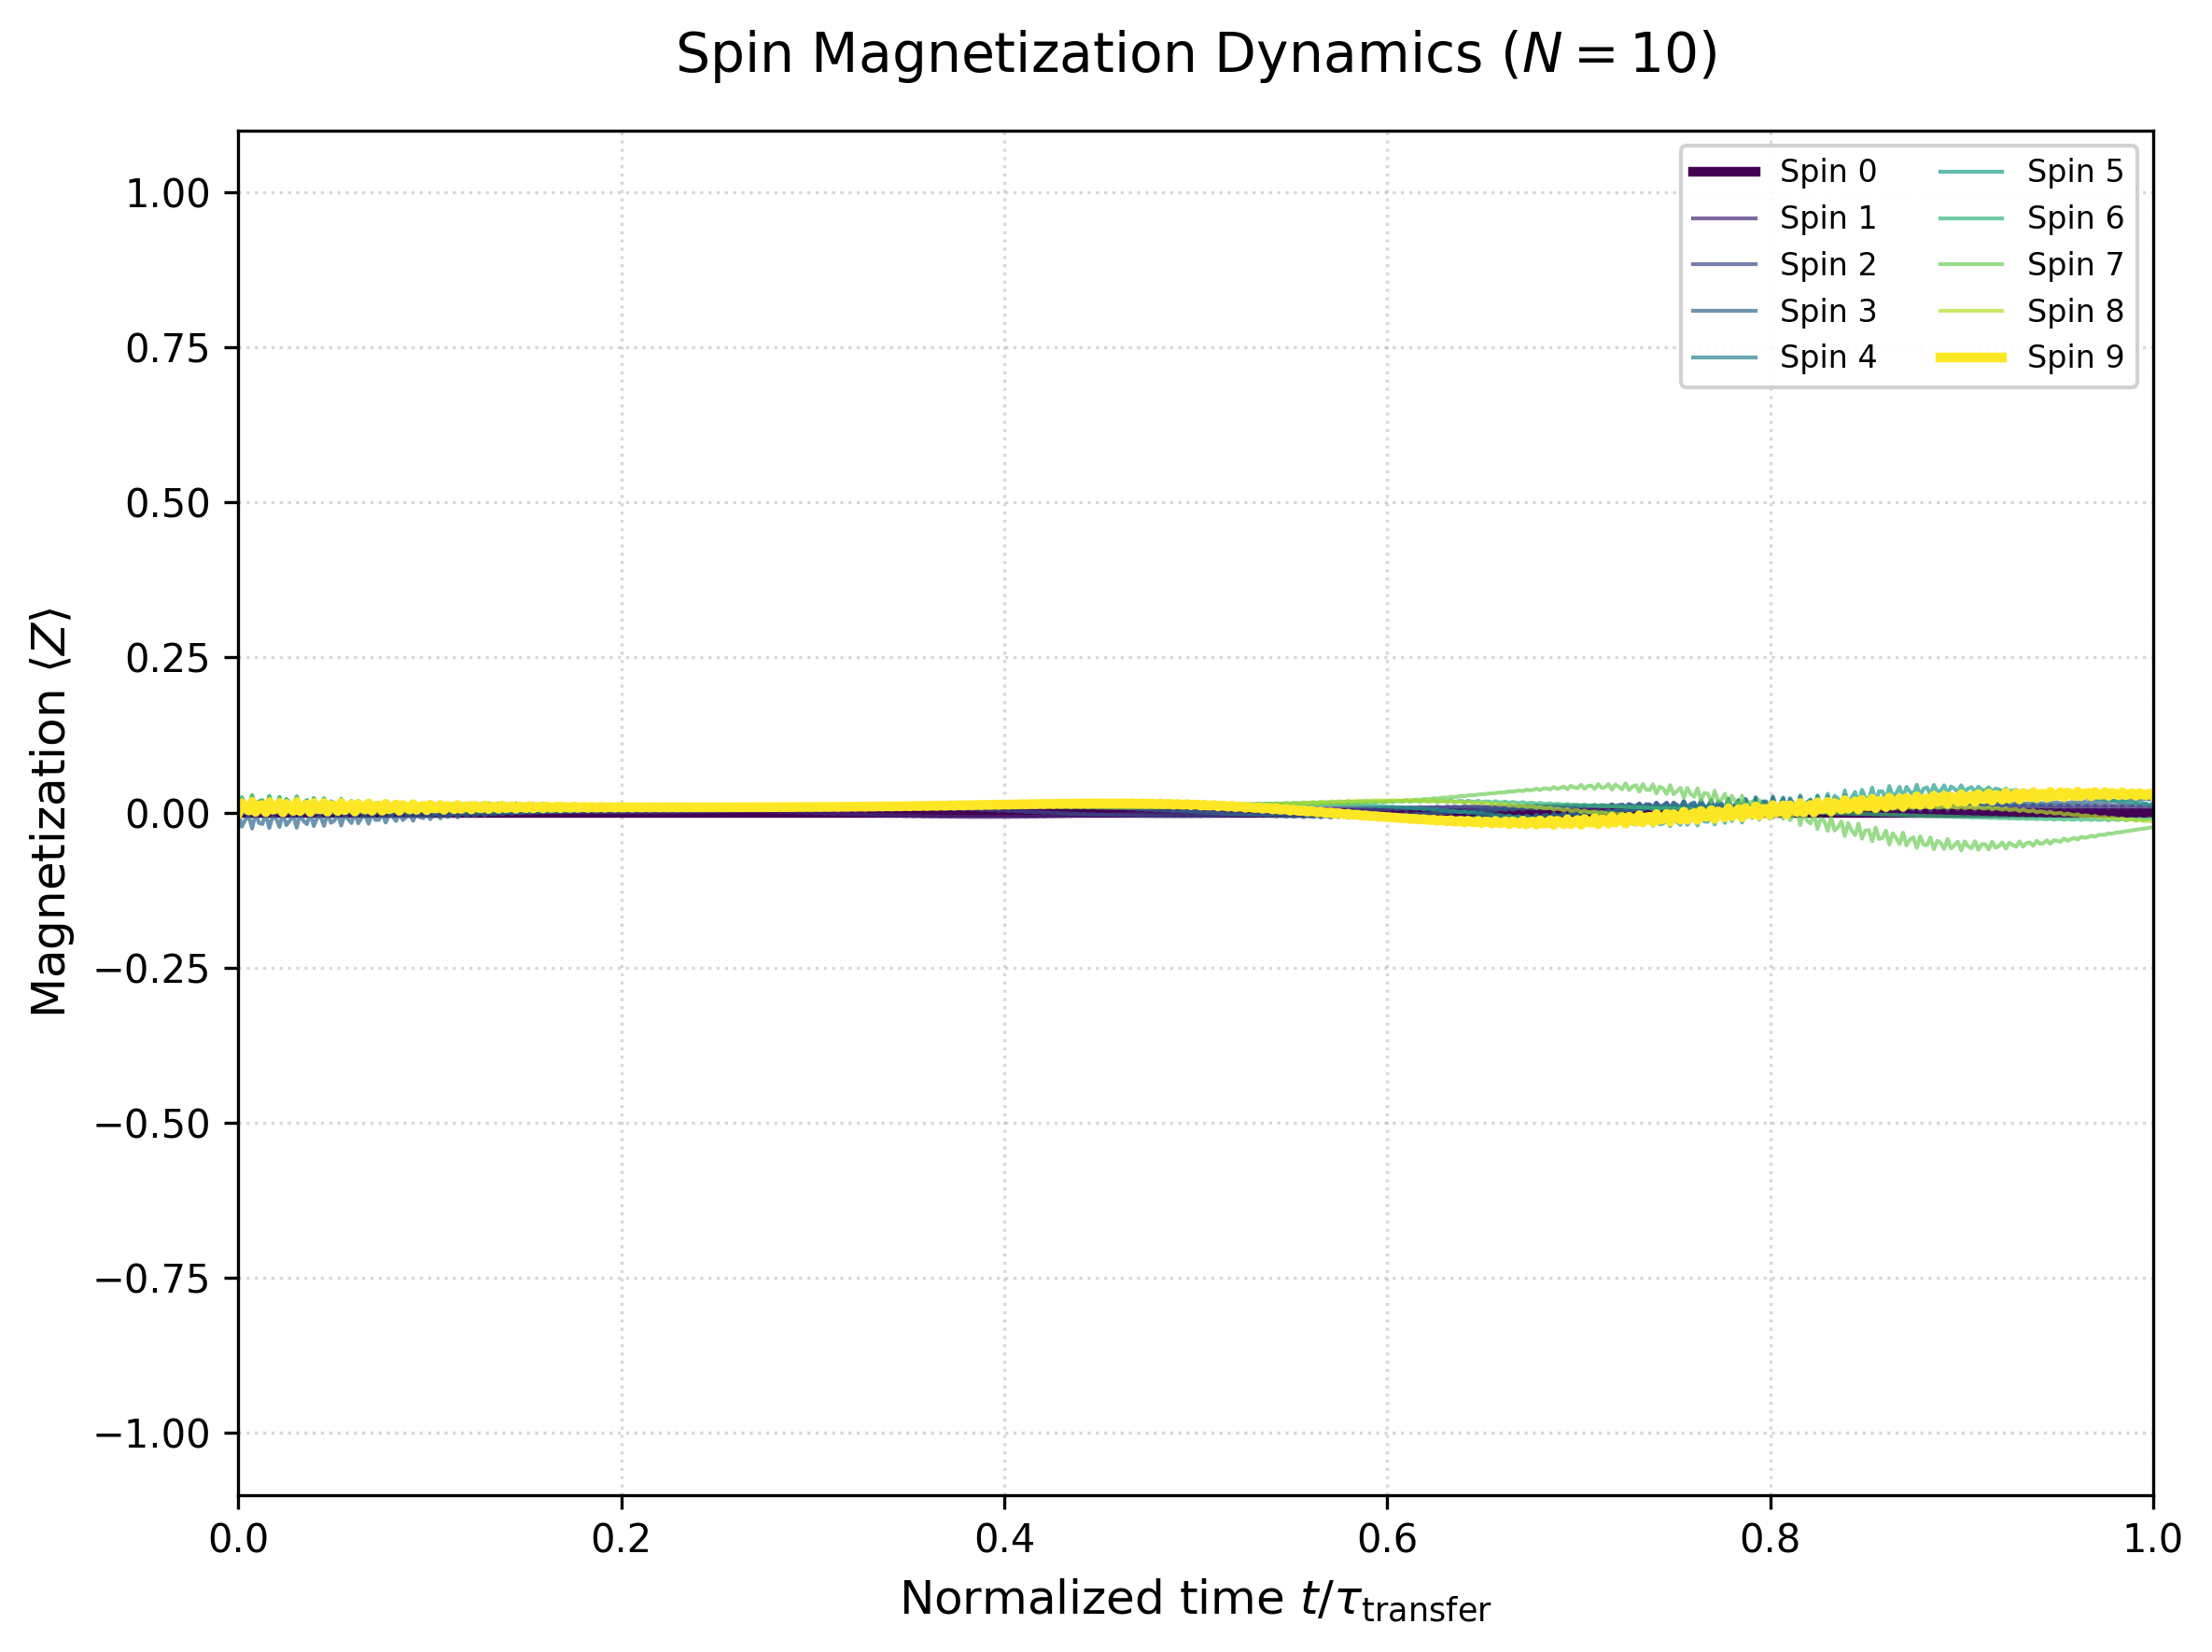

In [97]:
plots.plot_expectations_gradient(magnetizations["Sx"], N)

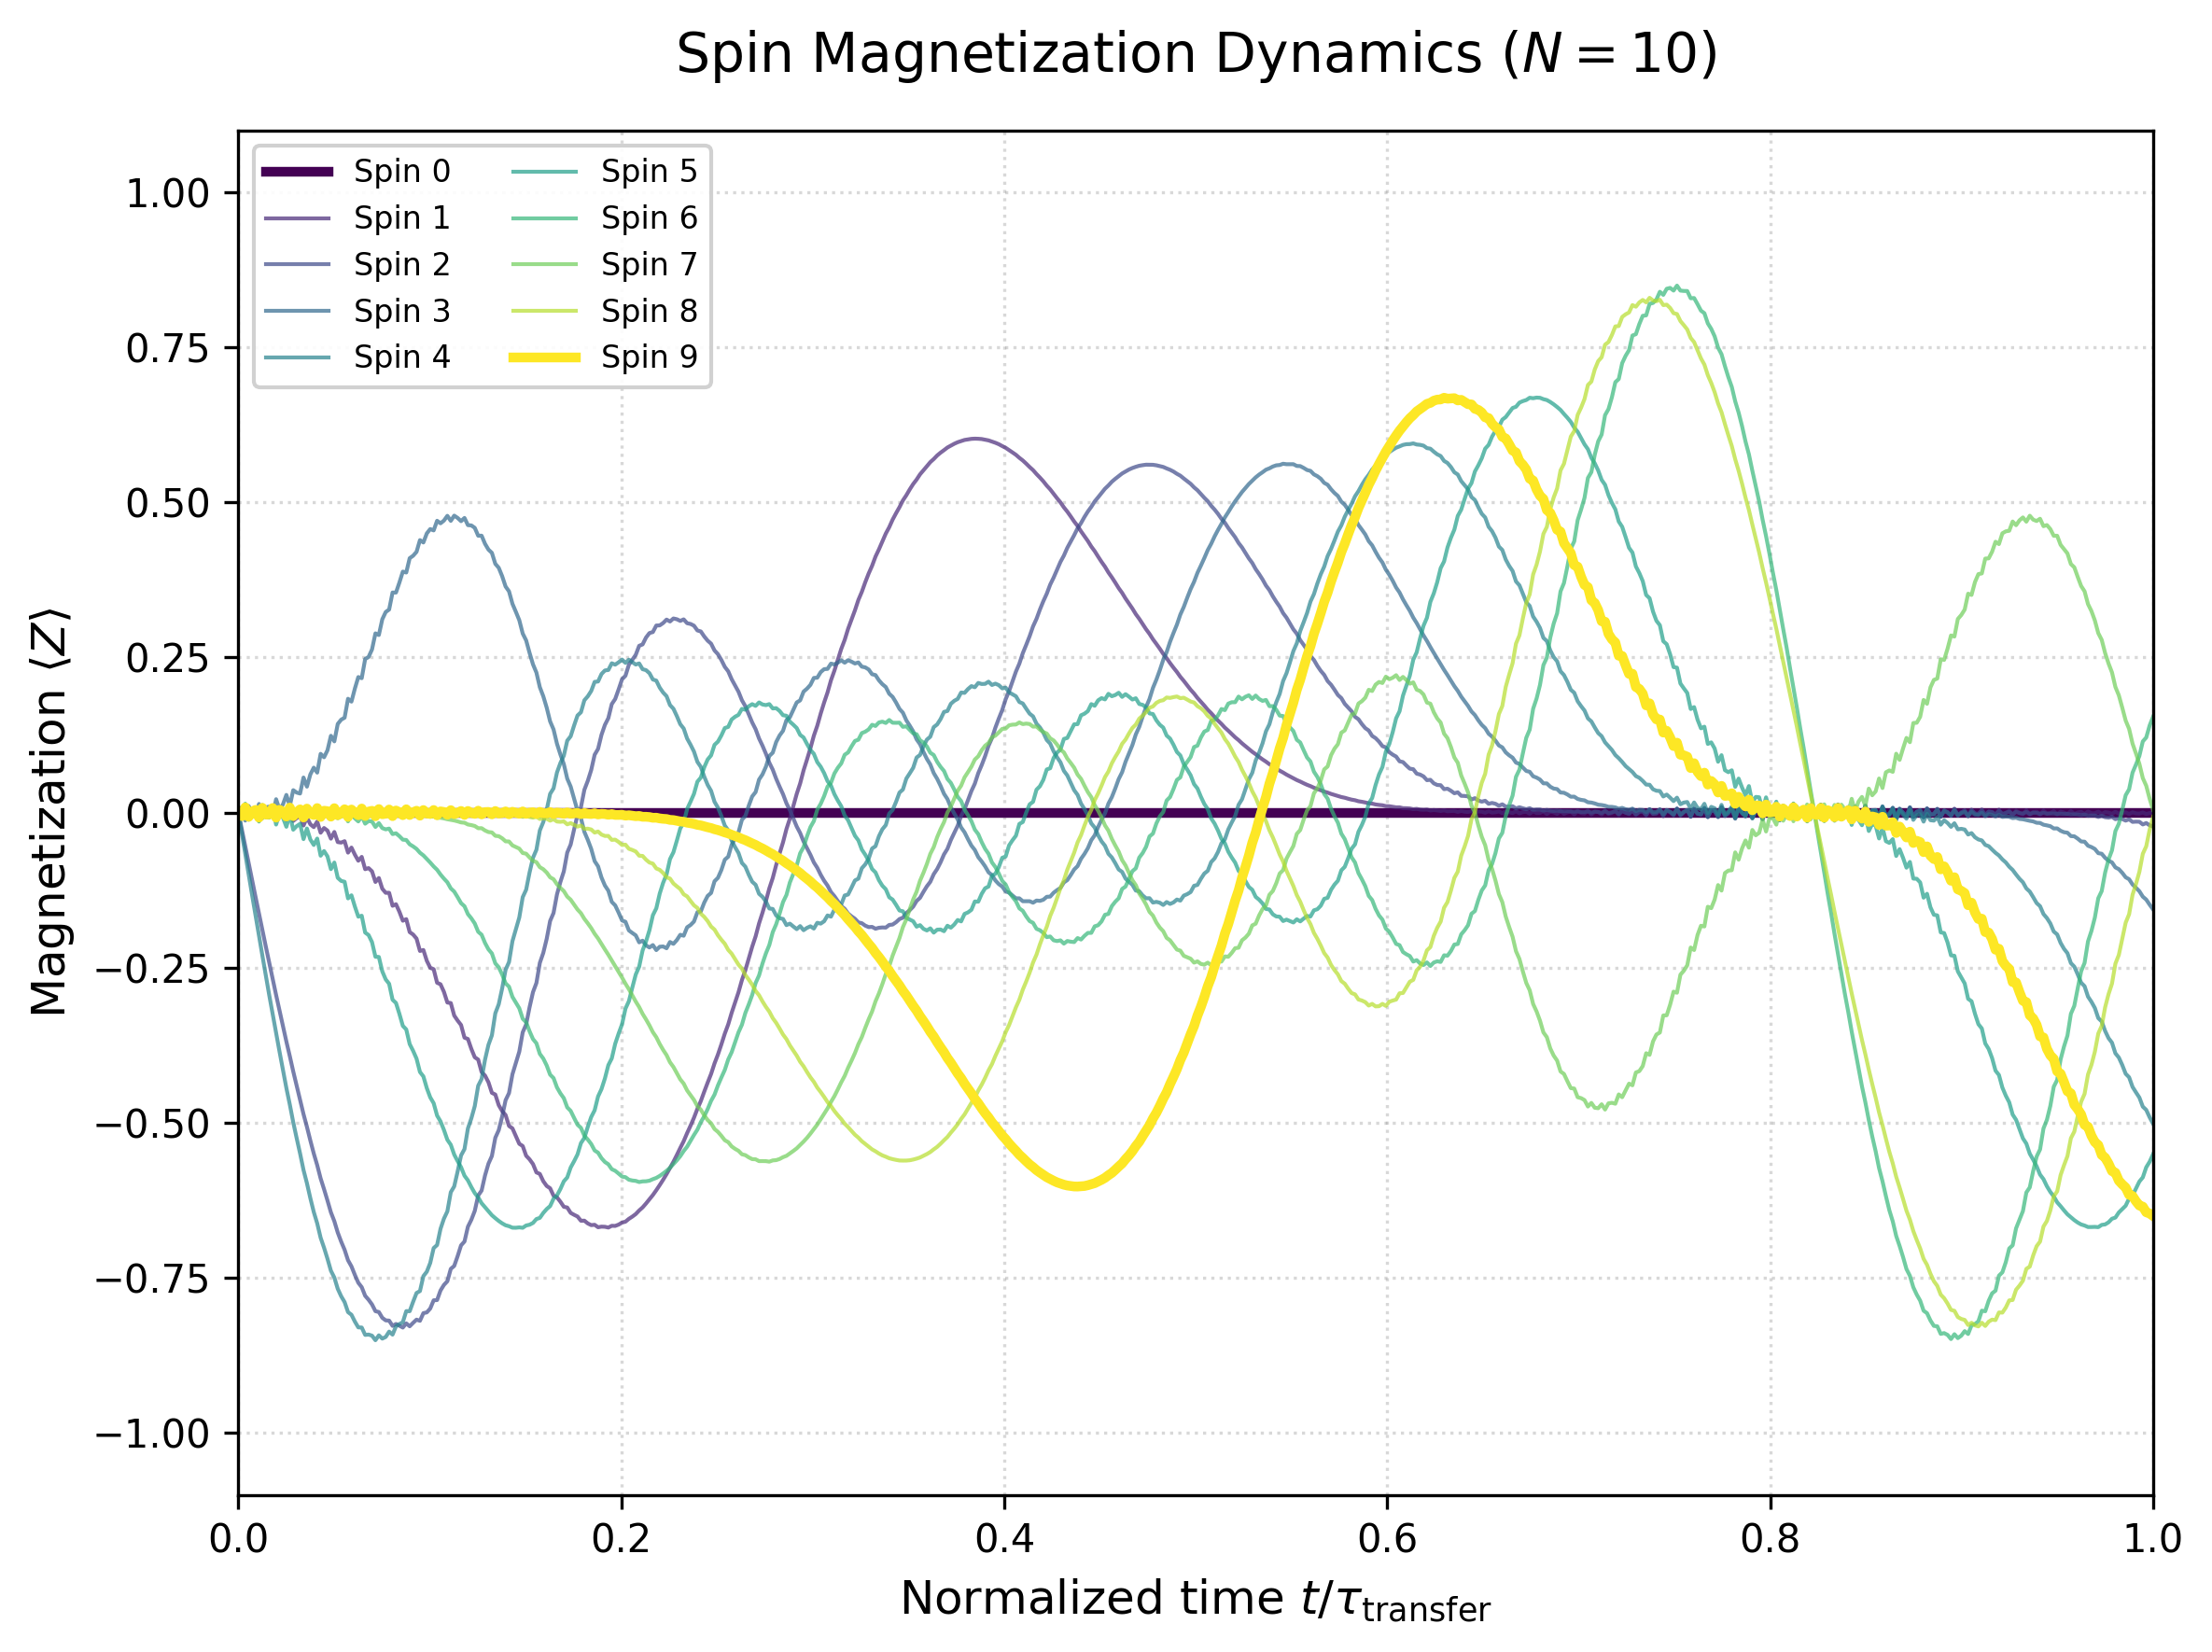

In [98]:
plots.plot_expectations_gradient(magnetizations["Sy"], N)

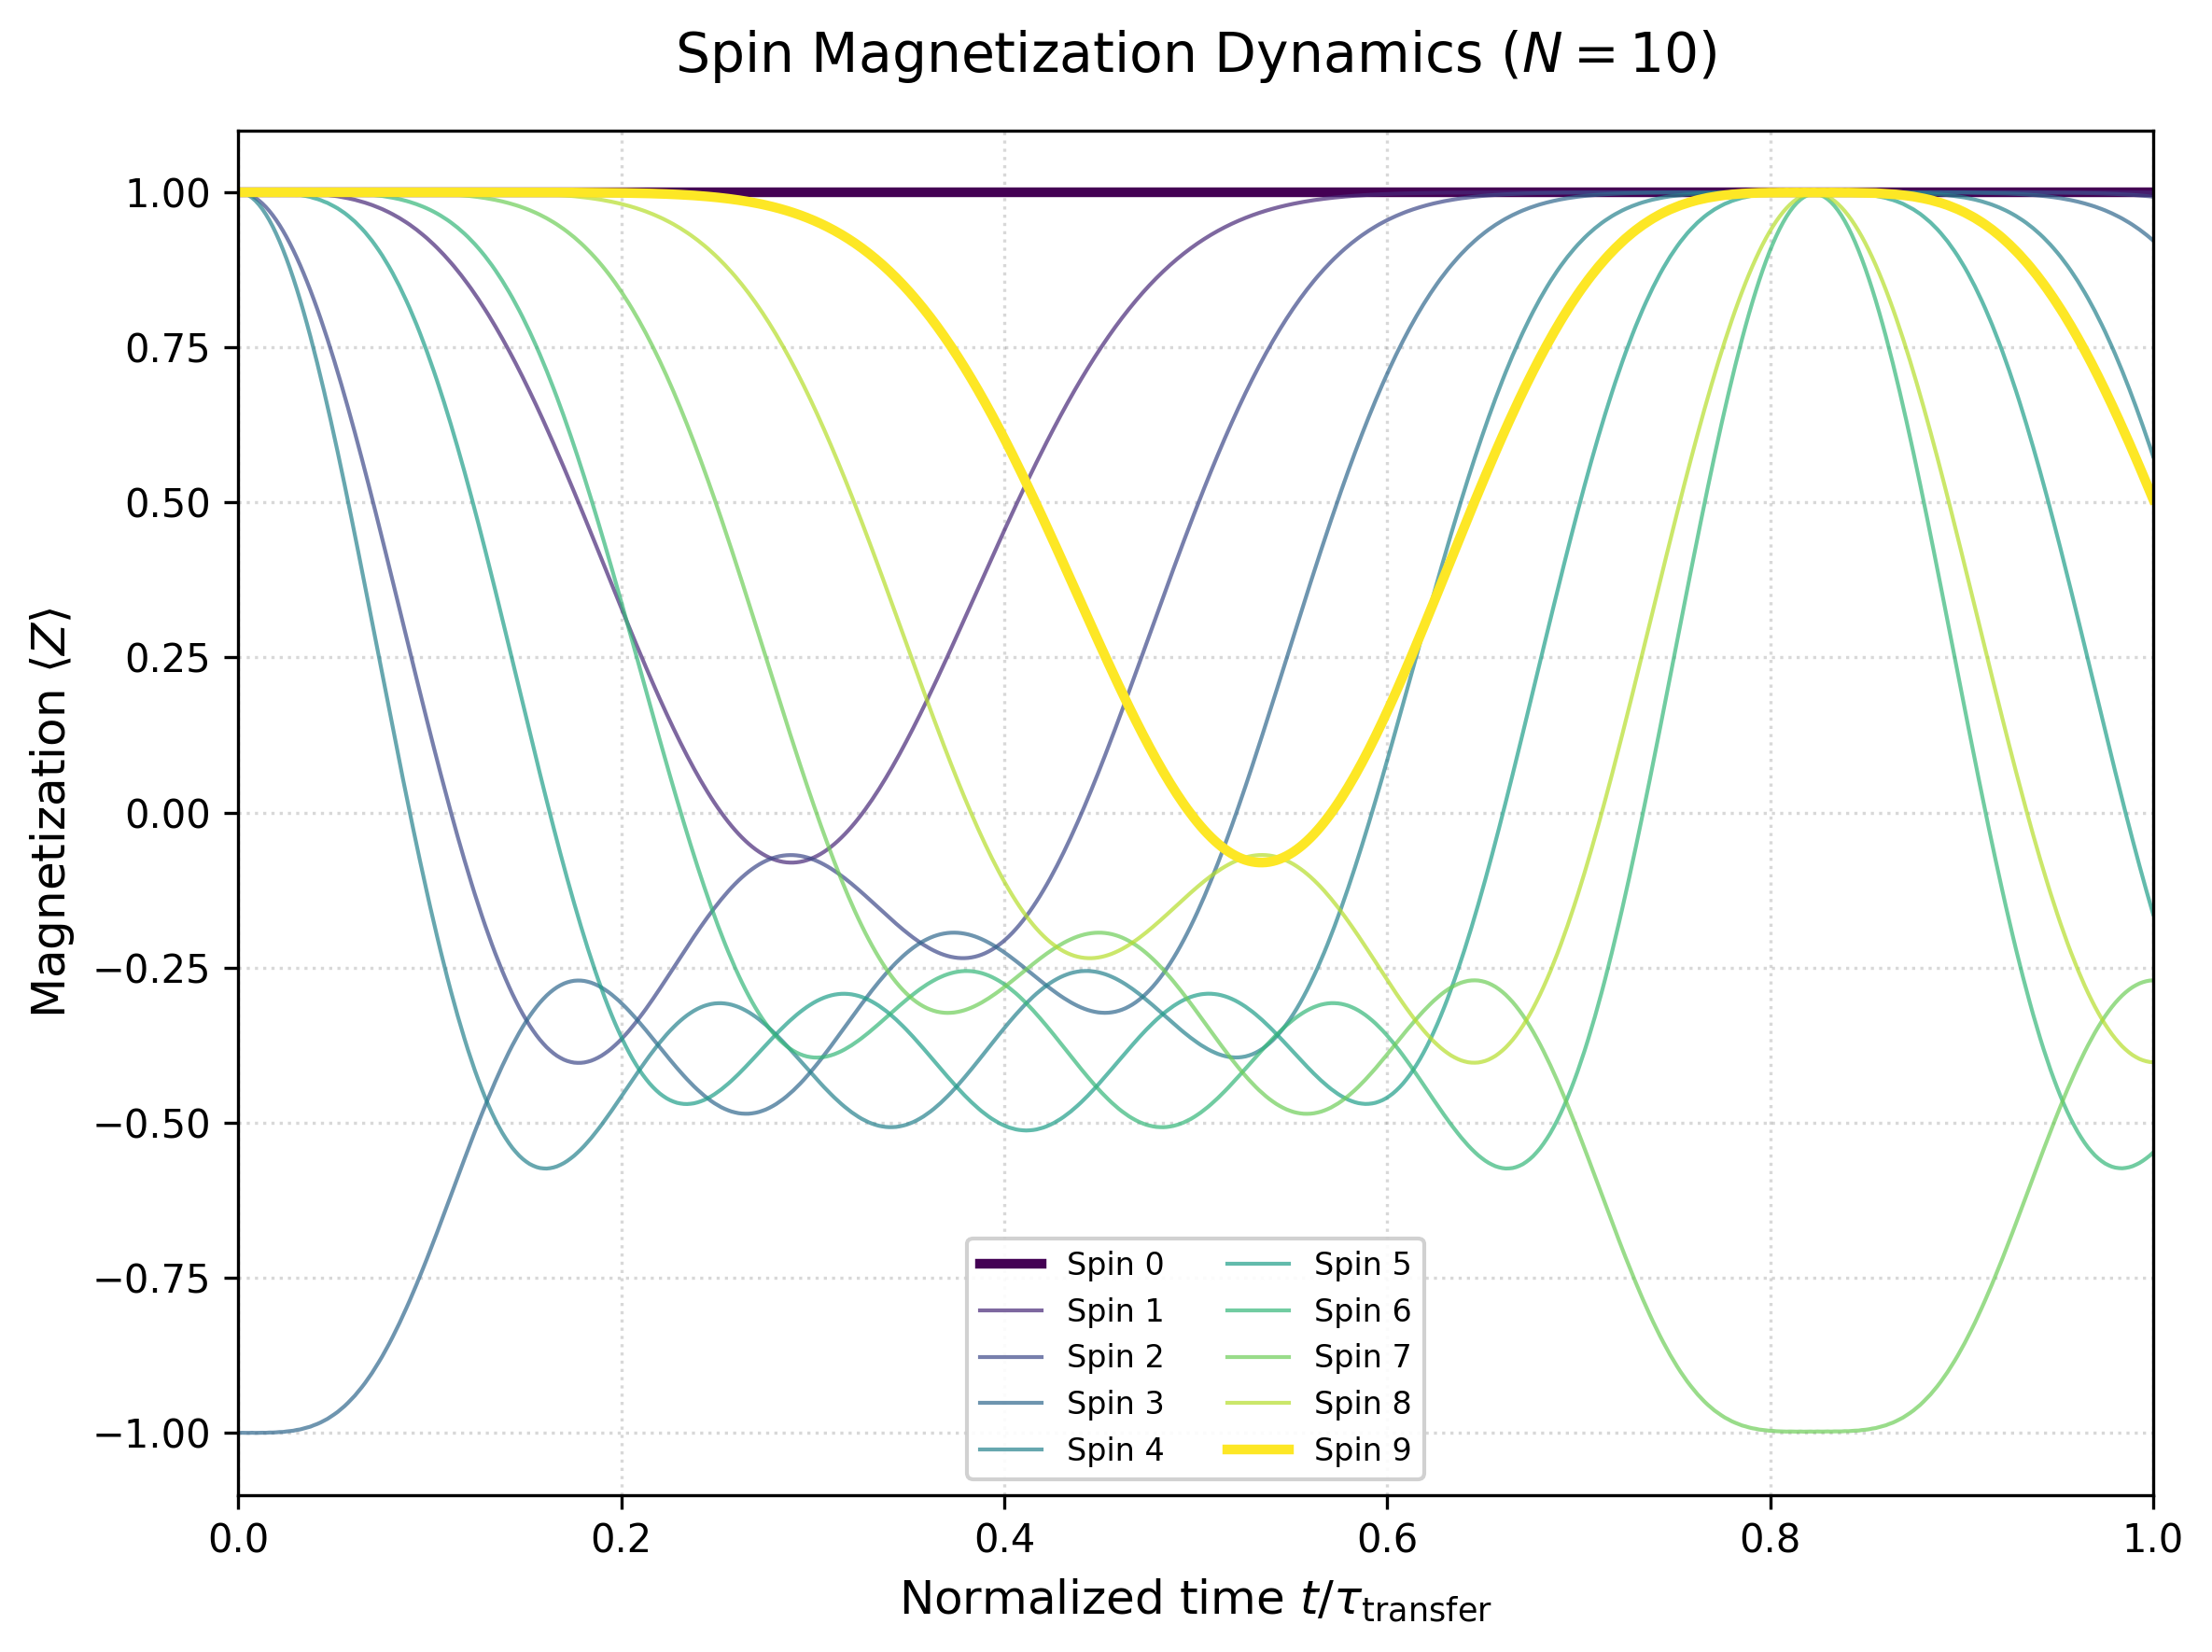

In [99]:
plots.plot_expectations_gradient(magnetizations["Sz"], N)